**Mengimpor library yang dibutuhkan :**
*   Numpy digunakan untuk operasi matematika.
*   matplotlib digunakan untuk visualisasi data.
*   pandas digunakan untuk membaca dataset dari file csv.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Membaca dataset dari file csv :**
*   Membaca dataset dari file Social_Network_Ads.csv
*   menyimpannya ke dalam variable dataset.


In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

**Menampilkan 5 baris pertama dataset :**
*   Menampilkan 5 baris pertama dataset menggunakan method head() dari pandas.


In [13]:
dataset.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

**Memilih kolom Age dan EstimatedSalary sebagai fitur (input) serta kolom Purchased sebagai target (output) dari dataset :**
*   Menggunakan iloc dari pandas untuk memilih kolom berdasarkan indeksnya, kemudian diubah menjadi numpy array menggunakan values.


In [4]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

In [ ]:
print(y)

**Memisahkan dataset menjadi data training dan data testing :**
*   Menggunakan train_test_split dari sklearn untuk memisahkan dataset menjadi data training dan data testing. test_size=0.25 artinya data testing akan diambil sebesar 25% dari total data, dan random_state=0 digunakan untuk memastikan hasil yang sama ketika kode dijalankan ulang.

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 0)

**Menampilkan jumlah data pada masing-masing bagian (data training, data testing, target training, target testing) :**
*   Menampilkan jumlah data pada masing-masing variable menggunakan len().

In [ ]:
print(x_train)

In [ ]:
len(x_train)

In [ ]:
len(x)

In [ ]:
len(x_test)

In [ ]:
len(y)

In [ ]:
len(y_test)

In [ ]:
len(y_train)

**Melakukan normalisasi pada data training dan data testing menggunakan StandardScaler :**
*   Melakukan normalisasi pada data training dan data testing menggunakan StandardScaler dari sklearn. *   *   Normalisasi dilakukan untuk membuat skala data sama agar tidak terjadi bias.

Kode di bawah melakukan preprocessing pada data dengan menggunakan StandardScaler dari modul scikit-learn. Preprocessing ini bertujuan untuk mengubah nilai fitur atau atribut sehingga memiliki skala yang sama.

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

In [ ]:
print(x_test)

**Membuat model K-NN dengan parameter n_neighbors=5, metric='minkowski', dan p=2 :**
*   Membuat model K-NN dengan menggunakan KNeighborsClassifier dari sklearn.
*   Parameter n_neighbors=5 artinya memilih 5 tetangga terdekat, metric='minkowski' artinya menggunakan jarak Minkowski, dan p=2 artinya menggunakan jarak Euclidean atau bisa disebut menentukan jarak yang digunakan untuk menghitung jarak antara data.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

**Melakukan prediksi pada data testing :**
*   Melakukan prediksi pada data testing menggunakan model yang sudah dibuat.


In [14]:
y_pred = classifier.predict(x_test)

## **Kode di bawah melakukan klasifikasi pada data uji menggunakan model yang telah dibuat sebelumnya.**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


## **Kode di bawah menampilkan confusion matrix yang menggambarkan hasil klasifikasi pada data uji.**

<ipython-input-38-647a9dea3f5e>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


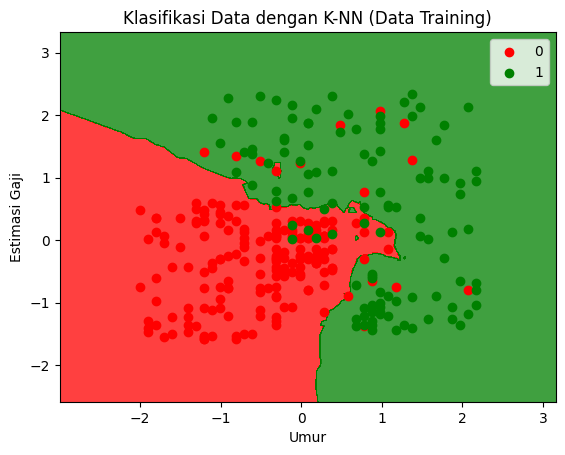

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

<ipython-input-39-e2bbf5e9df3b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


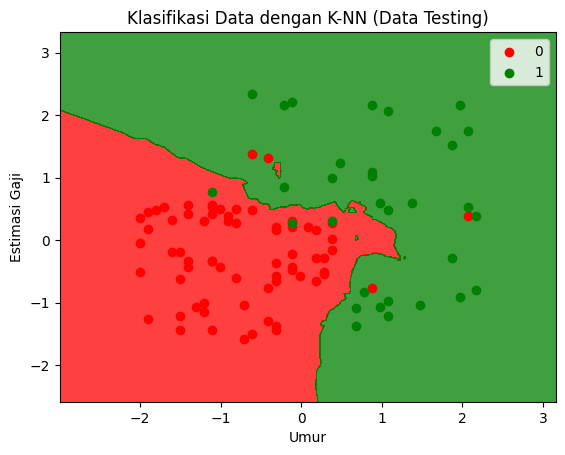

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()